 # Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/Country-data.csv")

In [3]:
dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
X = dataset.iloc[:,1:]

In [6]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Preprocessing

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
X_normal = MinMaxScaler().fit_transform(X)
X_normal = pd.DataFrame(X_normal,columns=X.columns)

## K-means

In [9]:
import sklearn
from sklearn.cluster import KMeans

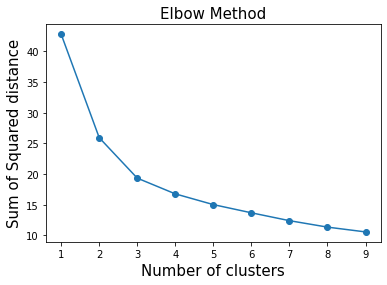

In [10]:
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_normal)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [12]:
dataset_k =dataset.copy()
dataset_k["cluster"] = kmeans.labels_
dataset_k["cluster"] = dataset_k["cluster"].astype("category")

In [13]:
dataset_k

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [14]:
#plt.figure(figsize=(12,6))
#sns.scatterplot(x = "income", y = "health",hue = "cluster", data = dataset_k)


In [15]:
import plotly.express as px

In [16]:
dataset_k["income"][dataset_k["cluster"]==1]

23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
Name: income, dtype: int64

In [17]:
fig = px.scatter(dataset_k, x="income", y="health", color="cluster",opacity=0.7,height=600, width=800)
fig.update_traces(marker=dict(size=7,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_k["income"][dataset_k["cluster"]==0]), y0=min(dataset_k["health"][dataset_k["cluster"]==0]),
    x1=max(dataset_k["income"][dataset_k["cluster"]==0]), y1=max(dataset_k["health"][dataset_k["cluster"]==0]),
    opacity=0.2,
    fillcolor="blue",
    line_color="black",
)

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_k["income"][dataset_k["cluster"]==1]), y0=min(dataset_k["health"][dataset_k["cluster"]==1]),
    x1=max(dataset_k["income"][dataset_k["cluster"]==1]), y1=max(dataset_k["health"][dataset_k["cluster"]==1]),
    opacity=0.2,
    fillcolor="green",
    line_color="black",
)

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_k["income"][dataset_k["cluster"]==2]), y0=min(dataset_k["health"][dataset_k["cluster"]==2]),
    x1=max(dataset_k["income"][dataset_k["cluster"]==2]), y1=max(dataset_k["health"][dataset_k["cluster"]==2]),
    opacity=0.2,
    fillcolor="red",
    line_color="black",
)

fig.update_layout(title_text='K-means 2D', title_x=0.5)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))
fig.show()

In [18]:
fig = px.scatter_3d(dataset_k, x = "income", y = "health", z='child_mort',
              color='cluster',symbol='cluster',opacity=0.7)
fig.update_traces(marker=dict(size=5,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.90,
    xanchor="right",
    x=0.75
))
fig.show()

## Fuzzy C-means

In [19]:
%pip install fuzzy-c-means

In [20]:
import fcmeans
from fcmeans import FCM

In [21]:
X_normal_np = X_normal.to_numpy()

In [22]:
fcm = FCM(n_clusters=3)
fcm.fit(X_normal_np)

In [23]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X_normal_np)

In [24]:
fcm_labels

DeviceArray([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2,
             2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0,
             1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1,
             0, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2,
             1, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1,
             2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 2, 2,
             2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0,
             2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0,
             2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [25]:
dataset_c =dataset.copy()
dataset_c["cluster"] = fcm_labels
dataset_c["cluster"] = dataset_c["cluster"].astype("category")

In [26]:
#plt.figure(figsize=(12,6))
#sns.scatterplot(x = "income", y = "health",hue = "cluster", data = dataset_c)

In [27]:
fig = px.scatter(dataset_c, x="income", y="health", color="cluster",opacity=0.7,height=600, width=800)
fig.update_traces(marker=dict(size=7,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_c["income"][dataset_c["cluster"]==0]), y0=min(dataset_c["health"][dataset_c["cluster"]==0]),
    x1=max(dataset_c["income"][dataset_c["cluster"]==0]), y1=max(dataset_c["health"][dataset_c["cluster"]==0]),
    opacity=0.2,
    fillcolor="green",
    line_color="black",
)

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_c["income"][dataset_c["cluster"]==1]), y0=min(dataset_c["health"][dataset_c["cluster"]==1]),
    x1=max(dataset_c["income"][dataset_c["cluster"]==1]), y1=max(dataset_c["health"][dataset_c["cluster"]==1]),
    opacity=0.2,
    fillcolor="blue",
    line_color="black",
)

fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_c["income"][dataset_c["cluster"]==2]), y0=min(dataset_c["health"][dataset_c["cluster"]==2]),
    x1=max(dataset_c["income"][dataset_c["cluster"]==2]), y1=max(dataset_c["health"][dataset_c["cluster"]==2]),
    opacity=0.2,
    fillcolor="red",
    line_color="black",
)

fig.update_layout(title_text='Fuzzy C-means 2D', title_x=0.5)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99
))
fig.show()

In [28]:
fig = px.scatter_3d(dataset_c, x = "income", y = "health", z='child_mort',
              color='cluster',symbol='cluster',opacity=0.7)
fig.update_traces(marker=dict(size=5,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.90,
    xanchor="right",
    x=0.75
))
fig.show()

# Clustering Plotly

In [29]:
import plotly.graph_objects as go

## K-means

In [30]:
fig = go.Figure()


# Add scatter traces
fig.add_trace(go.Scatter(x=dataset_k["income"][dataset_k["cluster"] == 1],
                         y=dataset_k["health"][dataset_k["cluster"] == 1], mode="markers"))
fig.add_trace(go.Scatter(x=dataset_k["income"][dataset_k["cluster"] == 2],
                         y=dataset_k["health"][dataset_k["cluster"] == 2], mode="markers"))
fig.add_trace(go.Scatter(x=dataset_k["income"][dataset_k["cluster"] == 0],
                         y=dataset_k["health"][dataset_k["cluster"] == 0], mode="markers"))

# Add shapes
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_k["income"][dataset_k["cluster"] == 1]), y0=min(dataset_k["health"][dataset_k["cluster"] == 1]),
    x1=max(dataset_k["income"][dataset_k["cluster"] == 1]), y1=max(dataset_k["health"][dataset_k["cluster"] == 1]),
    opacity=0.2,
    fillcolor="blue",
    line_color="blue",)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_k["income"][dataset_k["cluster"] == 2]), y0=min(dataset_k["health"][dataset_k["cluster"] == 2]),
    x1=max(dataset_k["income"][dataset_k["cluster"] == 2]), y1=max(dataset_k["health"][dataset_k["cluster"] == 2]),
    opacity=0.2,
    fillcolor="red",
    line_color="red",)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_k["income"][dataset_k["cluster"] == 0]), y0=min(dataset_k["health"][dataset_k["cluster"] == 0]),
    x1=max(dataset_k["income"][dataset_k["cluster"] == 0]), y1=max(dataset_k["health"][dataset_k["cluster"] == 0]),
    opacity=0.2,
    fillcolor="green",
    line_color="green",)


## C-means

In [31]:
fig = go.Figure()


# Add scatter traces
fig.add_trace(go.Scatter(x=dataset_c["income"][dataset_c["cluster"] == 1],
                         y=dataset_c["health"][dataset_c["cluster"] == 1], mode="markers"))
fig.add_trace(go.Scatter(x=dataset_c["income"][dataset_c["cluster"] == 2],
                         y=dataset_c["health"][dataset_c["cluster"] == 2], mode="markers"))
fig.add_trace(go.Scatter(x=dataset_c["income"][dataset_c["cluster"] == 0],
                         y=dataset_c["health"][dataset_c["cluster"] == 0], mode="markers"))

# Add shapes
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_c["income"][dataset_c["cluster"] == 1]), y0=min(dataset_c["health"][dataset_c["cluster"] == 1]),
    x1=max(dataset_c["income"][dataset_c["cluster"] == 1]), y1=max(dataset_c["health"][dataset_c["cluster"] == 1]),
    opacity=0.2,
    fillcolor="blue",
    line_color="blue",)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_c["income"][dataset_c["cluster"] == 2]), y0=min(dataset_c["health"][dataset_c["cluster"] == 2]),
    x1=max(dataset_c["income"][dataset_c["cluster"] == 2]), y1=max(dataset_c["health"][dataset_c["cluster"] == 2]),
    opacity=0.2,
    fillcolor="red",
    line_color="red",)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=min(dataset_c["income"][dataset_c["cluster"] == 0]), y0=min(dataset_c["health"][dataset_c["cluster"] == 0]),
    x1=max(dataset_c["income"][dataset_c["cluster"] == 0]), y1=max(dataset_c["health"][dataset_c["cluster"] == 0]),
    opacity=0.2,
    fillcolor="green",
    line_color="green",)